In [1]:
library(dplyr)
library(car)
library(ggplot2)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: carData
Warning message:
"package 'carData' was built under R version 3.6.3"
Attaching package: 'car'

The following object is masked from 'package:dplyr':

    recode

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


# 코로나 이전

In [2]:
전체<-read.csv('전체데이터_병합.csv')

In [3]:
head(전체)

y_m,city,location,area_cnt,em_cnt,em_g,pay_amt,제주도민_여,외국인거주_여,제주도민_남,...,기온,습도,강수,전국_누적확진자,전국_월별확진자,제주_누적확진자,제주_월별확진자,visit_pop_cnt,visit_pop_cnt_lf,visit_pop_cnt_sf
2018-01,서귀포시,남원읍,52,9570,42437700,1270773,9306,200,9806,...,6.256586,62.92070,1.891667,0,0,0,0,7650.916,469.7003,1686.0106
2018-01,서귀포시,대륜동,38,21666,57612600,1676850,6637,95,6836,...,8.004301,66.79301,2.958333,0,0,0,0,7964.611,371.7235,420.8336
2018-01,서귀포시,대정읍,89,10185,38885550,1164122,10725,677,10360,...,5.417876,70.94086,1.870833,0,0,0,0,4994.301,410.5112,356.2630
2018-01,서귀포시,대천동,37,20280,53858550,1593709,6475,137,6685,...,8.004301,66.79301,2.958333,0,0,0,0,4671.394,234.2381,225.5745
2018-01,서귀포시,동홍동,49,45936,118701000,3501286,11569,642,11124,...,5.771505,69.94489,3.812500,0,0,0,0,3881.022,270.2584,353.6994
2018-01,서귀포시,서홍동,24,15597,47230450,1397423,5335,66,5302,...,5.771505,69.94489,3.812500,0,0,0,0,1671.296,426.8739,1355.5257


In [4]:
전체<-subset(전체,select=-c(em_cnt,pay_amt)) #타겟변수인 배출량과 상관성이 너무크다.
전체<-subset(전체,location!="알수없음") 
전체

,y_m,city,location,area_cnt,em_g,제주도민_여,외국인거주_여,제주도민_남,외국인거주_남,제주도민_60이상,...,기온,습도,강수,전국_누적확진자,전국_월별확진자,제주_누적확진자,제주_월별확진자,visit_pop_cnt,visit_pop_cnt_lf,visit_pop_cnt_sf
1,2018-01,서귀포시,남원읍,52,42437700,9306,200,9806,428,5554,...,6.256586,62.92070,1.891667,0,0,0,0,7650.916,469.7003,1686.0106
2,2018-01,서귀포시,대륜동,38,57612600,6637,95,6836,83,2925,...,8.004301,66.79301,2.958333,0,0,0,0,7964.611,371.7235,420.8336
3,2018-01,서귀포시,대정읍,89,38885550,10725,677,10360,841,5330,...,5.417876,70.94086,1.870833,0,0,0,0,4994.301,410.5112,356.2630
4,2018-01,서귀포시,대천동,37,53858550,6475,137,6685,107,2372,...,8.004301,66.79301,2.958333,0,0,0,0,4671.394,234.2381,225.5745
5,2018-01,서귀포시,동홍동,49,118701000,11569,642,11124,624,3898,...,5.771505,69.94489,3.812500,0,0,0,0,3881.022,270.2584,353.6994
6,2018-01,서귀포시,서홍동,24,47230450,5335,66,5302,61,1857,...,5.771505,69.94489,3.812500,0,0,0,0,1671.296,426.8739,1355.5257
7,2018-01,서귀포시,성산읍,74,11343100,7332,560,8006,1015,4642,...,4.979167,67.88172,1.879167,0,0,0,0,11249.047,618.5432,785.5332
8,2018-01,서귀포시,송산동,20,22834700,2111,157,2344,366,1298,...,7.498925,63.95296,2.262500,0,0,0,0,1888.063,958.0544,151.0939
9,2018-01,서귀포시,안덕면,67,10007850,5524,264,5938,258,3031,...,5.869355,69.06855,2.150000,0,0,0,0,10304.252,472.3279,722.1710
10,2018-01,서귀포시,영천동,35,26620950,2526,60,2640,111,1514,...,5.847849,70.98925,1.537500,0,0,0,0,2474.981,414.1342,314.5992


In [12]:
코로나이전<-전체[c(1:978),]
tail(코로나이전)

,y_m,city,location,area_cnt,em_g,제주도민_여,외국인거주_여,제주도민_남,외국인거주_남,제주도민_60이상,...,기온,습도,강수,전국_누적확진자,전국_월별확진자,제주_누적확진자,제주_월별확진자,visit_pop_cnt,visit_pop_cnt_lf,visit_pop_cnt_sf
992,2020-02,제주시,일도1동,10,16871700,1270,39,1401,42,1002,...,9.185632,66.13937,1.241667,0,0,0,0,430.2515,179.2927,63.81029
993,2020-02,제주시,일도2동,87,153378350,17040,213,16538,101,7309,...,9.185632,66.13937,1.241667,0,0,0,0,3826.5275,276.3662,143.09128
994,2020-02,제주시,조천읍,141,33456300,12117,283,12820,369,6425,...,9.188218,66.15230,1.241667,0,0,0,0,8564.1096,595.2644,264.45640
995,2020-02,제주시,한경면,71,11589200,4485,112,4560,259,3308,...,8.928017,74.94828,1.733333,0,0,0,0,1926.7591,382.6238,142.76660
996,2020-02,제주시,한림읍,112,46197050,10341,1328,10985,2367,6201,...,8.476437,75.92816,2.312500,0,0,0,0,5788.7887,856.1009,419.89140
997,2020-02,제주시,화북동,84,114810400,12418,190,12383,222,4430,...,9.185632,66.13937,1.241667,0,0,0,0,4732.4232,226.5343,99.65484


In [13]:
변수제거<-subset(코로나이전,select=-c(y_m,city,location))
변수제거

,area_cnt,em_g,제주도민_여,외국인거주_여,제주도민_남,외국인거주_남,제주도민_60이상,제주도민_60미만,total_pop,패스트푸드_결제건수,...,기온,습도,강수,전국_누적확진자,전국_월별확진자,제주_누적확진자,제주_월별확진자,visit_pop_cnt,visit_pop_cnt_lf,visit_pop_cnt_sf
1,52,42437700,9306,200,9806,428,5554,14186,19740,3337,...,6.256586,62.92070,1.891667,0,0,0,0,7650.916,469.7003,1686.0106
2,38,57612600,6637,95,6836,83,2925,10726,13651,4889,...,8.004301,66.79301,2.958333,0,0,0,0,7964.611,371.7235,420.8336
3,89,38885550,10725,677,10360,841,5330,17273,22603,5221,...,5.417876,70.94086,1.870833,0,0,0,0,4994.301,410.5112,356.2630
4,37,53858550,6475,137,6685,107,2372,11032,13404,5136,...,8.004301,66.79301,2.958333,0,0,0,0,4671.394,234.2381,225.5745
5,49,118701000,11569,642,11124,624,3898,20061,23959,6908,...,5.771505,69.94489,3.812500,0,0,0,0,3881.022,270.2584,353.6994
6,24,47230450,5335,66,5302,61,1857,8907,10764,3904,...,5.771505,69.94489,3.812500,0,0,0,0,1671.296,426.8739,1355.5257
7,74,11343100,7332,560,8006,1015,4642,12271,16913,2344,...,4.979167,67.88172,1.879167,0,0,0,0,11249.047,618.5432,785.5332
8,20,22834700,2111,157,2344,366,1298,3680,4978,880,...,7.498925,63.95296,2.262500,0,0,0,0,1888.063,958.0544,151.0939
9,67,10007850,5524,264,5938,258,3031,8953,11984,2185,...,5.869355,69.06855,2.150000,0,0,0,0,10304.252,472.3279,722.1710
10,35,26620950,2526,60,2640,111,1514,3823,5337,1284,...,5.847849,70.98925,1.537500,0,0,0,0,2474.981,414.1342,314.5992


In [14]:
변수제거2<-subset(변수제거,select=-c(전국_누적확진자,전국_월별확진자,제주_누적확진자,제주_월별확진자))
head(변수제거2)

area_cnt,em_g,제주도민_여,외국인거주_여,제주도민_남,외국인거주_남,제주도민_60이상,제주도민_60미만,total_pop,패스트푸드_결제건수,...,배달_결제금액,식당_결제건수,식당_결제금액,풍속,기온,습도,강수,visit_pop_cnt,visit_pop_cnt_lf,visit_pop_cnt_sf
52,42437700,9306,200,9806,428,5554,14186,19740,3337,...,5163749,17810,661392952,2.619220,6.256586,62.92070,1.891667,7650.916,469.7003,1686.0106
38,57612600,6637,95,6836,83,2925,10726,13651,4889,...,9839787,23440,812067796,1.831317,8.004301,66.79301,2.958333,7964.611,371.7235,420.8336
89,38885550,10725,677,10360,841,5330,17273,22603,5221,...,9267134,29023,987405447,6.011290,5.417876,70.94086,1.870833,4994.301,410.5112,356.2630
37,53858550,6475,137,6685,107,2372,11032,13404,5136,...,8813941,21592,703082321,1.831317,8.004301,66.79301,2.958333,4671.394,234.2381,225.5745
49,118701000,11569,642,11124,624,3898,20061,23959,6908,...,15937712,38565,1464008139,1.109409,5.771505,69.94489,3.812500,3881.022,270.2584,353.6994
24,47230450,5335,66,5302,61,1857,8907,10764,3904,...,2841908,18973,697930995,1.109409,5.771505,69.94489,3.812500,1671.296,426.8739,1355.5257


# 0.선형성

In [15]:
다중회귀1<-lm(em_g ~ .,data=변수제거2)
summary(다중회귀1)


Call:
lm(formula = em_g ~ ., data = 변수제거2)

Residuals:
      Min        1Q    Median        3Q       Max 
-72924106  -7070763     49121   6725018  45011829 

Coefficients: (2 not defined because of singularities)
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             7.314e+06  5.249e+06   1.393 0.163811    
area_cnt               -4.339e+05  5.438e+04  -7.979 4.24e-15 ***
제주도민_여             3.097e+04  2.837e+03  10.914  < 2e-16 ***
외국인거주_여          -1.609e+04  8.809e+03  -1.826 0.068168 .  
제주도민_남            -2.760e+04  2.544e+03 -10.850  < 2e-16 ***
외국인거주_남           2.644e+04  5.200e+03   5.085 4.42e-07 ***
제주도민_60이상        -3.574e+03  1.263e+03  -2.830 0.004760 ** 
제주도민_60미만                NA         NA      NA       NA    
total_pop                      NA         NA      NA       NA    
패스트푸드_결제건수     2.980e+03  1.492e+03   1.997 0.046152 *  
패스트푸드_결제금액     1.415e-01  7.500e-02   1.886 0.059562 .  
간식_결제건수          -6.598e+02  1.098e+03  -0.601

In [16]:
#total_pop,제주도민_60미만제거 -> 코로나 이후 데이터 참고
선형성1<-subset(변수제거2,select=-c(total_pop,제주도민_60미만))
다중회귀2<-lm(em_g ~ .,data=선형성1)
summary(다중회귀2)


Call:
lm(formula = em_g ~ ., data = 선형성1)

Residuals:
      Min        1Q    Median        3Q       Max 
-72924106  -7070763     49121   6725018  45011829 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             7.314e+06  5.249e+06   1.393 0.163811    
area_cnt               -4.339e+05  5.438e+04  -7.979 4.24e-15 ***
제주도민_여             3.097e+04  2.837e+03  10.914  < 2e-16 ***
외국인거주_여          -1.609e+04  8.809e+03  -1.826 0.068168 .  
제주도민_남            -2.760e+04  2.544e+03 -10.850  < 2e-16 ***
외국인거주_남           2.644e+04  5.200e+03   5.085 4.42e-07 ***
제주도민_60이상        -3.574e+03  1.263e+03  -2.830 0.004760 ** 
패스트푸드_결제건수     2.980e+03  1.492e+03   1.997 0.046152 *  
패스트푸드_결제금액     1.415e-01  7.500e-02   1.886 0.059562 .  
간식_결제건수          -6.598e+02  1.098e+03  -0.601 0.548200    
간식_결제금액          -7.751e-02  8.872e-02  -0.874 0.382535    
농축수산물_결제건수    -1.180e+02  4.733e+02  -0.249 0.803218    
농축수산물_결제금액     6.640e-02  1.083e-02  

# 1. 다중공선성

In [17]:
backward <- step(다중회귀2, direction = "backward", trace = T)
backward
backward$anova 

Start:  AIC=32111.36
em_g ~ area_cnt + 제주도민_여 + 외국인거주_여 + 제주도민_남 + 
    외국인거주_남 + 제주도민_60이상 + 패스트푸드_결제건수 + 패스트푸드_결제금액 + 
    간식_결제건수 + 간식_결제금액 + 농축수산물_결제건수 + 농축수산물_결제금액 + 
    마트.슈퍼마켓_결제건수 + 마트.슈퍼마켓_결제금액 + 식품_결제건수 + 
    식품_결제금액 + 배달_결제건수 + 배달_결제금액 + 식당_결제건수 + 
    식당_결제금액 + 풍속 + 기온 + 습도 + 강수 + visit_pop_cnt + 
    visit_pop_cnt_lf + visit_pop_cnt_sf

                         Df  Sum of Sq        RSS   AIC
- visit_pop_cnt           1 7.0938e+09 1.6787e+17 32109
- 풍속                    1 1.0729e+12 1.6787e+17 32109
- 농축수산물_결제건수     1 1.0978e+13 1.6788e+17 32109
- 식품_결제금액           1 5.3837e+13 1.6792e+17 32110
- visit_pop_cnt_sf        1 6.2732e+13 1.6793e+17 32110
- 간식_결제건수           1 6.3756e+13 1.6793e+17 32110
- 간식_결제금액           1 1.3487e+14 1.6800e+17 32110
- 식품_결제건수           1 1.5156e+14 1.6802e+17 32110
- 배달_결제금액           1 2.7415e+14 1.6814e+17 32111
<none>                                 1.6787e+17 32111
- 배달_결제건수           1 4.1931e+14 1.6829e+17 32112
- 기온                 


Call:
lm(formula = em_g ~ area_cnt + 제주도민_여 + 외국인거주_여 + 
    제주도민_남 + 외국인거주_남 + 제주도민_60이상 + 패스트푸드_결제건수 + 
    패스트푸드_결제금액 + 간식_결제금액 + 농축수산물_결제금액 + 
    마트.슈퍼마켓_결제건수 + 마트.슈퍼마켓_결제금액 + 배달_결제건수 + 
    배달_결제금액 + 식당_결제건수 + 식당_결제금액 + 기온 + 습도 + 
    강수 + visit_pop_cnt_lf, data = 선형성1)

Coefficients:
           (Intercept)                area_cnt             제주도민_여  
             6.004e+06              -4.092e+05               3.003e+04  
         외국인거주_여             제주도민_남           외국인거주_남  
            -1.431e+04              -2.702e+04               2.472e+04  
       제주도민_60이상     패스트푸드_결제건수     패스트푸드_결제금액  
            -2.915e+03               3.208e+03               1.170e-01  
         간식_결제금액     농축수산물_결제금액  마트.슈퍼마켓_결제건수  
            -1.256e-01               6.375e-02               1.179e+03  
마트.슈퍼마켓_결제금액           배달_결제건수           배달_결제금액  
            -2.654e-02              -6.416e+03               2.355e-01  
         식당_결제건수           식당_결제금액                    기온  
           

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
,NA,NA,950,1.678679e+17,32111.36
- visit_pop_cnt,1,7.093769e+09,951,1.678679e+17,32109.36
- 풍속,1,1.124150e+12,952,1.678691e+17,32107.37
- 농축수산물_결제건수,1,1.059164e+13,953,1.678797e+17,32105.43
- 식품_결제금액,1,4.561694e+13,954,1.679253e+17,32103.70
- 간식_결제건수,1,4.433219e+13,955,1.679696e+17,32101.95
- visit_pop_cnt_sf,1,9.062790e+13,956,1.680602e+17,32100.48
- 식품_결제건수,1,1.863417e+14,957,1.682466e+17,32099.57


In [18]:
#위 변수들 제거
선형성2<-subset(선형성1,select=-c(visit_pop_cnt,풍속,농축수산물_결제건수,식품_결제금액,간식_결제건수,visit_pop_cnt_sf,식품_결제건수))
다중회귀3<-lm(em_g ~ .,data=선형성2)
summary(다중회귀3)


Call:
lm(formula = em_g ~ ., data = 선형성2)

Residuals:
      Min        1Q    Median        3Q       Max 
-73498793  -7110294     68025   6671073  46634369 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             6.004e+06  4.563e+06   1.316  0.18848    
area_cnt               -4.092e+05  4.512e+04  -9.068  < 2e-16 ***
제주도민_여             3.003e+04  2.547e+03  11.789  < 2e-16 ***
외국인거주_여          -1.431e+04  7.587e+03  -1.885  0.05967 .  
제주도민_남            -2.702e+04  2.311e+03 -11.692  < 2e-16 ***
외국인거주_남           2.472e+04  4.483e+03   5.514 4.52e-08 ***
제주도민_60이상        -2.915e+03  1.014e+03  -2.874  0.00414 ** 
패스트푸드_결제건수     3.208e+03  1.283e+03   2.500  0.01257 *  
패스트푸드_결제금액     1.170e-01  6.697e-02   1.747  0.08101 .  
간식_결제금액          -1.256e-01  5.114e-02  -2.457  0.01420 *  
농축수산물_결제금액     6.375e-02  6.703e-03   9.511  < 2e-16 ***
마트.슈퍼마켓_결제건수  1.179e+03  1.446e+02   8.153 1.11e-15 ***
마트.슈퍼마켓_결제금액 -2.654e-02  3.959e-03  -6.70

In [19]:
backward2 <- step(다중회귀3, direction = "backward", trace = T)
backward2
backward2$anova 

Start:  AIC=32099.57
em_g ~ area_cnt + 제주도민_여 + 외국인거주_여 + 제주도민_남 + 
    외국인거주_남 + 제주도민_60이상 + 패스트푸드_결제건수 + 패스트푸드_결제금액 + 
    간식_결제금액 + 농축수산물_결제금액 + 마트.슈퍼마켓_결제건수 + 
    마트.슈퍼마켓_결제금액 + 배달_결제건수 + 배달_결제금액 + 
    식당_결제건수 + 식당_결제금액 + 기온 + 습도 + 강수 + visit_pop_cnt_lf

                         Df  Sum of Sq        RSS   AIC
<none>                                 1.6825e+17 32100
- 배달_결제금액           1 3.5088e+14 1.6860e+17 32100
- 기온                    1 4.6012e+14 1.6871e+17 32100
- 배달_결제건수           1 4.9621e+14 1.6874e+17 32100
- visit_pop_cnt_lf        1 5.0962e+14 1.6876e+17 32101
- 패스트푸드_결제금액     1 5.3638e+14 1.6878e+17 32101
- 강수                    1 5.9099e+14 1.6884e+17 32101
- 외국인거주_여           1 6.2500e+14 1.6887e+17 32101
- 간식_결제금액           1 1.0609e+15 1.6931e+17 32104
- 패스트푸드_결제건수     1 1.0992e+15 1.6935e+17 32104
- 제주도민_60이상         1 1.4522e+15 1.6970e+17 32106
- 습도                    1 1.6602e+15 1.6991e+17 32107
- 식당_결제건수           1 1.8671e+15 1.7011e+17 32108
- 식당_결제금액      


Call:
lm(formula = em_g ~ area_cnt + 제주도민_여 + 외국인거주_여 + 
    제주도민_남 + 외국인거주_남 + 제주도민_60이상 + 패스트푸드_결제건수 + 
    패스트푸드_결제금액 + 간식_결제금액 + 농축수산물_결제금액 + 
    마트.슈퍼마켓_결제건수 + 마트.슈퍼마켓_결제금액 + 배달_결제건수 + 
    배달_결제금액 + 식당_결제건수 + 식당_결제금액 + 기온 + 습도 + 
    강수 + visit_pop_cnt_lf, data = 선형성2)

Coefficients:
           (Intercept)                area_cnt             제주도민_여  
             6.004e+06              -4.092e+05               3.003e+04  
         외국인거주_여             제주도민_남           외국인거주_남  
            -1.431e+04              -2.702e+04               2.472e+04  
       제주도민_60이상     패스트푸드_결제건수     패스트푸드_결제금액  
            -2.915e+03               3.208e+03               1.170e-01  
         간식_결제금액     농축수산물_결제금액  마트.슈퍼마켓_결제건수  
            -1.256e-01               6.375e-02               1.179e+03  
마트.슈퍼마켓_결제금액           배달_결제건수           배달_결제금액  
            -2.654e-02              -6.416e+03               2.355e-01  
         식당_결제건수           식당_결제금액                    기온  
           

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
,NA,NA,957,1.682466e+17,32099.57


In [20]:
vif(다중회귀3)

area_cnt            제주도민_여          외국인거주_여 
             19.700753            1600.315628              23.323304 
           제주도민_남          외국인거주_남        제주도민_60이상 
           1242.328269              12.965722              25.081126 
   패스트푸드_결제건수    패스트푸드_결제금액          간식_결제금액 
            336.349635             249.484131             126.240456 
   농축수산물_결제금액 마트.슈퍼마켓_결제건수 마트.슈퍼마켓_결제금액 
              7.345974             125.649747              89.518036 
         배달_결제건수          배달_결제금액          식당_결제건수 
           1032.864345             965.361616             677.511597 
         식당_결제금액                   기온                   습도 
            511.545553               2.950398               2.334459 
                  강수       visit_pop_cnt_lf 
              1.684543               2.183571

### 공선성제거(인구자료 목표)

In [21]:
#공선성원인제거(인구자료 목표)  -> 과정은 코로나 이후기간 분석 참고
선형성3<-subset(선형성2,select=-c(패스트푸드_결제건수,패스트푸드_결제금액,간식_결제금액,농축수산물_결제금액,마트.슈퍼마켓_결제건수,마트.슈퍼마켓_결제금액,배달_결제건수,식당_결제건수,식당_결제금액,배달_결제금액,제주도민_남,외국인거주_여,강수,습도))
다중회귀4<-lm(em_g ~ .,data=선형성3)
summary(다중회귀4)
vif(다중회귀4)


Call:
lm(formula = em_g ~ ., data = 선형성3)

Residuals:
      Min        1Q    Median        3Q       Max 
-91067337 -11162495    845744  10445621  69023344 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      18963797.6  1973576.7   9.609  < 2e-16 ***
area_cnt          -868193.4    43963.0 -19.748  < 2e-16 ***
제주도민_여         17314.4      289.1  59.881  < 2e-16 ***
외국인거주_남       16379.2     2562.1   6.393 2.53e-10 ***
제주도민_60이상    -15703.0      710.8 -22.093  < 2e-16 ***
기온               466050.9    86282.9   5.401 8.32e-08 ***
visit_pop_cnt_lf   -11208.8     3087.2  -3.631 0.000297 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 19050000 on 971 degrees of freedom
Multiple R-squared:  0.9071,	Adjusted R-squared:  0.9065 
F-statistic:  1580 on 6 and 971 DF,  p-value: < 2.2e-16


area_cnt      제주도민_여    외국인거주_남  제주도민_60이상 
        9.065319         9.995566         2.052859         5.971415 
            기온 visit_pop_cnt_lf 
        1.006448         1.583269

### 공선성제거(결제자료 목표)

In [22]:
#공선성제거(결제자료 목표) -> 과정은 코로나 이후기간 분석 참고
선형성4<-subset(선형성2,select=-c(area_cnt,visit_pop_cnt_lf,제주도민_여,외국인거주_여,제주도민_남,외국인거주_남,제주도민_60이상,배달_결제건수,식당_결제건수,패스트푸드_결제건수,마트.슈퍼마켓_결제건수,식당_결제금액,간식_결제금액,패스트푸드_결제금액,습도,강수,배달_결제금액))
다중회귀5<-lm(em_g ~ .,data=선형성4)
summary(다중회귀5)
vif(다중회귀5)


Call:
lm(formula = em_g ~ ., data = 선형성4)

Residuals:
      Min        1Q    Median        3Q       Max 
-93192518  -8371060   1831572  10516290  79860338 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -6.622e+06  1.823e+06  -3.632 0.000295 ***
농축수산물_결제금액     1.347e-01  7.365e-03  18.297  < 2e-16 ***
마트.슈퍼마켓_결제금액  3.715e-02  1.246e-03  29.806  < 2e-16 ***
기온                    2.880e+05  9.577e+04   3.007 0.002707 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 21190000 on 974 degrees of freedom
Multiple R-squared:  0.8846,	Adjusted R-squared:  0.8842 
F-statistic:  2489 on 3 and 974 DF,  p-value: < 2.2e-16


농축수산물_결제금액 마트.슈퍼마켓_결제금액                   기온 
              3.471955               3.474533               1.001548

-----------

### 유의미한 변수파악은 여기까지로 결정함.

# 2.등분산성

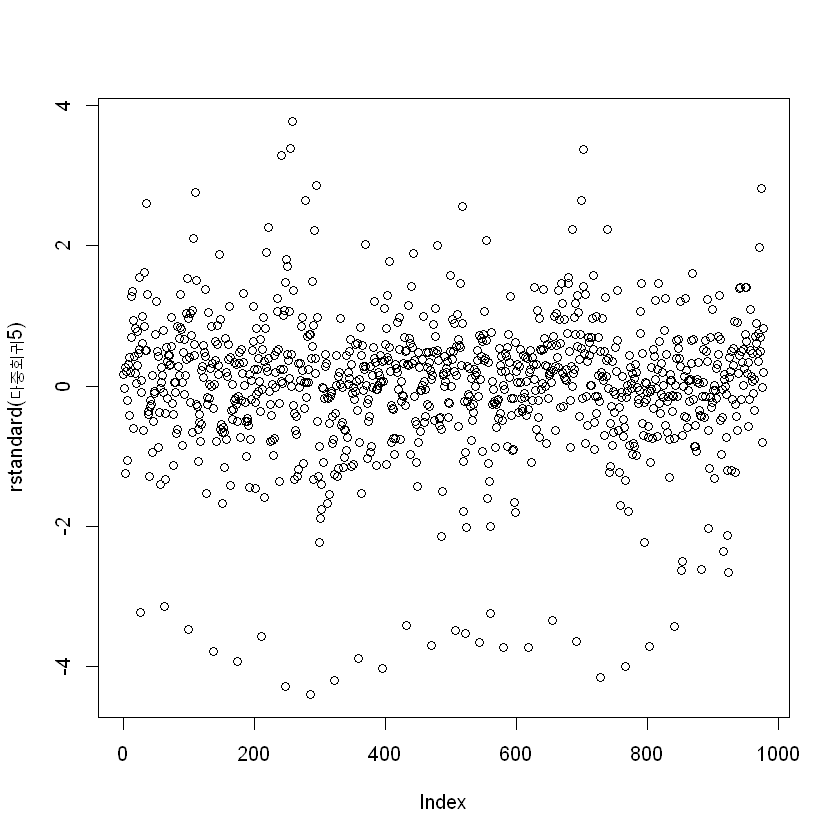

In [25]:
plot(rstandard(다중회귀5)) #잔차의 등분산성

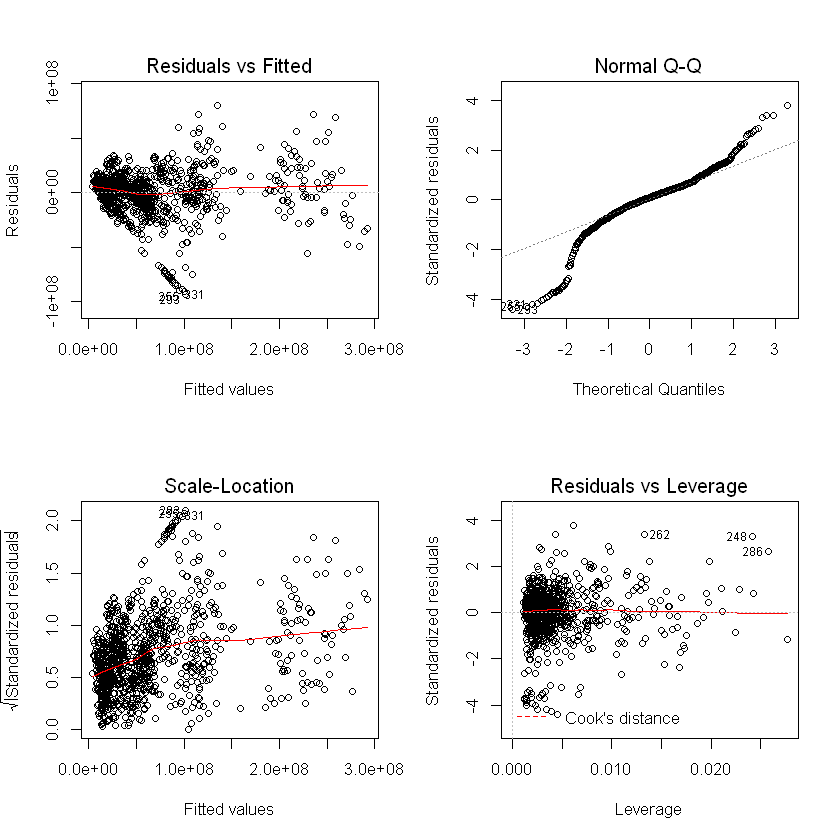

In [27]:
par(mfrow=c(2,2))
plot(다중회귀5)#잔차의 등분산성

# 3.정규성

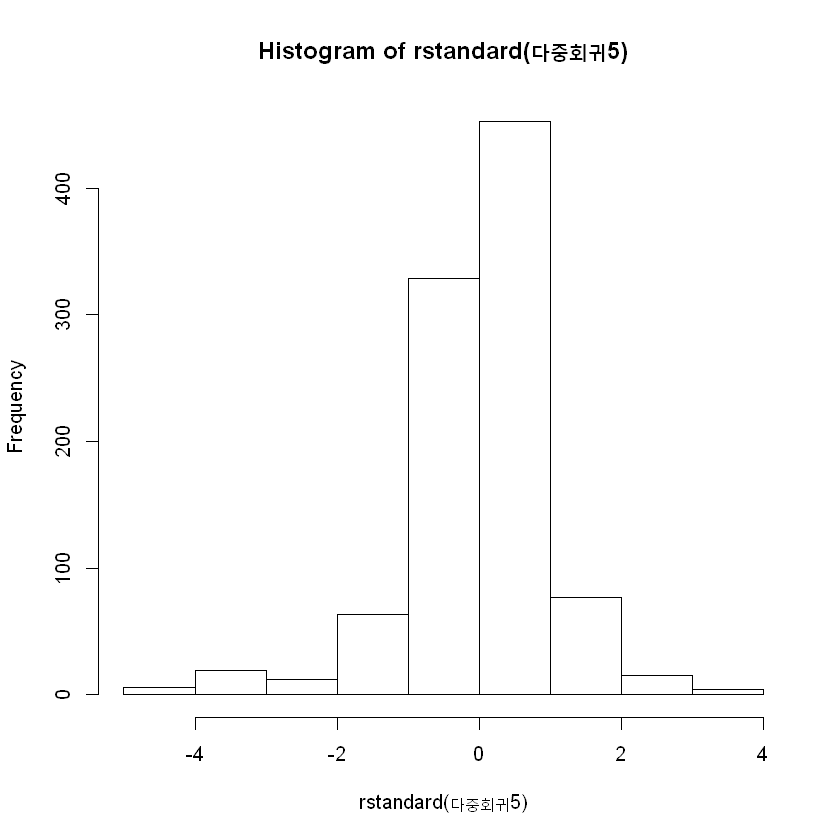

In [28]:
hist(rstandard(다중회귀5))#잔차의 정규성

In [29]:
shapiro.test(residuals(다중회귀5)) 
#귀무가설 = 정규분포와 차이가 없다. -> 기각 -> 정규분포와 차이가 있음.
#출처 : https://m.blog.naver.com/shoutjoy/221830887127


	Shapiro-Wilk normality test

data:  residuals(다중회귀5)
W = 0.90572, p-value < 2.2e-16
